In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/PFA' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = os.path.join("/content/drive/MyDrive/PFA/single_resnet50/Blast_PCRM_R12-0221b ROI.bmp")

In [ ]:
import cv2

y=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(y.shape)

(256, 256)


In [ ]:
import csv
pathcsv = os.path.join("/content/drive/MyDrive/PFA/new_data/real_size.csv")
filecsv = open(pathcsv)

In [ ]:
def load_img(path):
    s = f"{path}"
    return (s)

In [ ]:
s=load_img(path)

In [ ]:
y=cv2.imread(s, cv2.IMREAD_GRAYSCALE)
print(y.shape)

(256, 256)


In [ ]:
csvreader = csv.reader(filecsv)
rows = []
for row in csvreader:
    rows.append(row)

print(rows)
nb=len(rows) # nb ofimages = of 

for r in rows:
    name=r[0]#name of image
    h=r[1]#height
    w=r[2]#width

elem='Blast_PCRM_R12-0221b.bmp'
#remember: new data file names have 'ROI' in them
#either sort both files when reading 
#(sort elems of csv and images of newdat> results_resnet50 )
# or find common string

i=0
pos=0
for row in rows:
  if row[0]==elem:
    pos=i
    break
  i=i+1

original_height= int(rows[pos][1])
original_width= int(rows[pos][2])

[['Blast_PCRM_R14-0186.bmp', '406', '468'], ['Blast_PCRM_1202591 D5.bmp', '396', '468'], ['Blast_PCRM_R13-0235a.bmp', '398', '505'], ['Blast_PCRM_R13-0014A.bmp', '350', '470'], ['Blast_PCRM_R13-0385b.bmp', '402', '435'], ['Blast_PCRM_R16-0037a.bmp', '413', '458'], ['Blast_PCRM_R16-0157a.bmp', '417', '504'], ['Blast_PCRM_R16-0075a.bmp', '382', '509'], ['Blast_PCRM_1202833 D5.bmp', '421', '433'], ['Blast_PCRM_R13-0309b.bmp', '382', '389'], ['Blast_PCRM_R16-0195A.bmp', '465', '516'], ['Blast_PCRM_R16-0276A.bmp', '436', '539'], ['Blast_PCRM_R16-0199A.bmp', '406', '506'], ['Blast_PCRM_d5.bmp', '339', '384'], ['Blast_PCRM_R13-0044.bmp', '315', '372'], ['Blast_PCRM_R16-0344A.bmp', '384', '471'], ['Blast_PCRM_R16-0138a.bmp', '418', '523'], ['Blast_PCRM_R12-0160.bmp', '356', '401'], ['Blast_PCRM_R14-0369a.bmp', '401', '498'], ['Blast_PCRM_R12-0259.bmp', '418', '494'], ['Blast_PCRM_d5.bmp', '378', '424'], ['Blast_PCRM_R12-0221b.bmp', '408', '474'], ['Blast_PCRM_R13-0410a.bmp', '395', '443'], ['B

In [ ]:
import numpy as np

In [ ]:
def feature(img,val):
  
  #I'm only constructing the image in case we need perimeter (contour detection) or something later
  
  area=0
  for x in range(h):
    for y in range(w):
      if img[x,y]==val:
        
        area+=1#nb pixels
      
  return area

In [ ]:

print(y.shape)
imagef = cv2.resize(y, (original_width, original_height), interpolation = cv2.INTER_NEAREST)
print(imagef.shape)

(256, 256)
(408, 474)


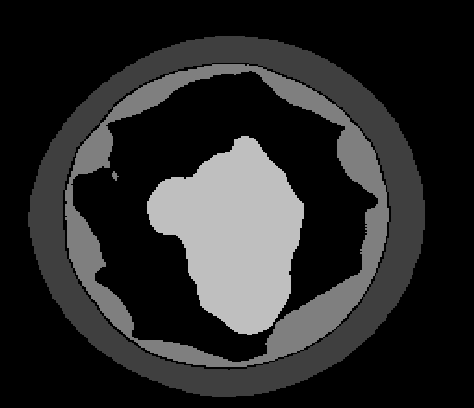

In [ ]:

from google.colab.patches import cv2_imshow
cv2_imshow(imagef)
#gives different values in image

In [ ]:
#this part just shows the nb of pixels with a specific colour
colours, counts = np.unique(imagef.reshape(-1,1), axis=0, return_counts=1)
# Iterate through unique colours
for index, colour in enumerate(colours):
    count = counts[index]
    print(f"   Colour: {colour}, count: {count}")

   Colour: [0], count: 125040
   Colour: [63], count: 31270
   Colour: [127], count: 17707
   Colour: [191], count: 19375


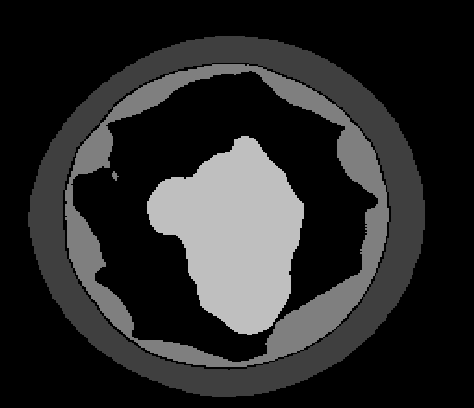

In [ ]:
cv2_imshow(imagef)

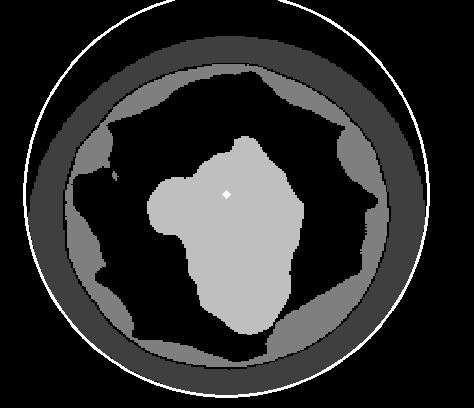

[[[226 194 202]]]


In [ ]:
circles = cv2.HoughCircles(imagef,cv2.HOUGH_GRADIENT, 1, 100, param1= 100, param2=20, minRadius=110, maxRadius=220)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(imagef,(i[0],i[1]),i[2],(255,255,255),2)
    # draw the center of the circle
    cv2.circle(imagef,(i[0],i[1]),2,(255,255,255),3)
cv2_imshow(imagef)
print(circles)

In [ ]:
h=imagef.shape[0]
w=imagef.shape[1]


In [ ]:
h_c=h//2
w_c=w//2
pixel_centree=(h_c,w_c)

In [ ]:
height=0
radius=0
nb=0
while (height<=h_c) :
    if imagef[height,w_c]!=0 :
      radius=radius+1
    height=height+1

In [ ]:
width=0
zp_right=0
while(width<=w_c) :
  if imagef[h_c,width]==63 :
      zp_right=zp_right+1
  width=width+1

In [ ]:
width=w_c
zp_left=0
while(width<w) :
  if imagef[h_c,width]==63 :
      zp_left=zp_left+1
  width=width+1

In [ ]:
height=0
zp_high=0

while (height<=h_c) :
    if imagef[height,w_c]==63 :
      zp_high=zp_high+1
    height=height+1

In [ ]:
height=h_c
zp_down=0

while (height<h) :
    if imagef[height,w_c]==63 :
      zp_down=zp_down+1
    height=height+1

In [ ]:
zp_thickness=(zp_down+zp_high+zp_right+zp_left)/4

In [ ]:
zp_thickness

30.5

In [25]:
radius

103